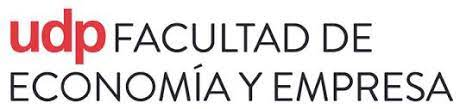



# UDP - Bussines Analytics 1
# Solemne 01


### Contenido de la clase:

### Exploratory Data Analysis de Prueba 01

### Contenido de la clase
* Aspectos Generales
* Preparación de la data

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc

### Instalación de la librería de estadísticas

In [1]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [2]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [3]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/UDP_BA01/data_store.csv",sep=",",encoding="latin-1")
# # To display the top 5 rows
# df.head(5)

In [4]:
df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9007,9008,CA-2017-107825,11/18/2017,11/18/2017,Same Day,NB-18655,Nona Balk,Corporate,United States,Milwaukee,...,53209,Central,OFF-LA-10003720,Office Supplies,Labels,Avery 487,7.380,2,0.0,3.4686
2967,2968,CA-2014-162866,12/27/2014,12/31/2014,Standard Class,Co-12640,Corey-Lock,Consumer,United States,Skokie,...,60076,Central,OFF-ST-10002562,Office Supplies,Storage,Staple magnet,30.016,4,0.2,3.0016
4006,4007,US-2015-168732,12/10/2015,12/16/2015,Standard Class,KM-16660,Khloe Miller,Consumer,United States,Roswell,...,30076,South,OFF-PA-10000520,Office Supplies,Paper,Xerox 201,25.920,4,0.0,12.4416
9547,9548,CA-2016-131744,6/18/2016,6/20/2016,Second Class,SC-20770,Stewart Carmichael,Corporate,United States,Philadelphia,...,19134,East,OFF-PA-10004610,Office Supplies,Paper,Xerox 1900,6.848,2,0.2,2.1400
5962,5963,CA-2014-140732,11/11/2014,11/13/2014,Second Class,MA-17560,Matt Abelman,Home Office,United States,Los Angeles,...,90004,West,OFF-AP-10001626,Office Supplies,Appliances,Commercial WindTunnel Clean Air Upright Vacuum...,7.780,2,0.0,2.0228
9008,9009,CA-2017-107825,11/18/2017,11/18/2017,Same Day,NB-18655,Nona Balk,Corporate,United States,Milwaukee,...,53209,Central,FUR-FU-10000206,Furniture,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",5.820,2,0.0,2.7354
9351,9352,CA-2016-159009,9/23/2016,9/27/2016,Standard Class,DP-13105,Dave Poirier,Corporate,United States,Seattle,...,98115,West,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,184.752,3,0.2,-20.7846
4382,4383,US-2015-122784,7/20/2015,7/27/2015,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Highland Park,...,60035,Central,OFF-BI-10000546,Office Supplies,Binders,Avery Durable Binders,2.880,5,0.8,-4.4640
161,162,CA-2015-119697,12/28/2015,12/31/2015,Second Class,EM-13960,Eric Murdock,Consumer,United States,Philadelphia,...,19134,East,TEC-AC-10003657,Technology,Accessories,Lenovo 17-Key USB Numeric Keypad,54.384,2,0.2,1.3596
332,333,US-2016-150147,4/25/2016,4/29/2016,Second Class,JL-15850,John Lucas,Consumer,United States,Philadelphia,...,19134,East,OFF-BI-10001153,Office Supplies,Binders,Ibico Recycled Grain-Textured Covers,20.724,2,0.7,-13.8160


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [5]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: >

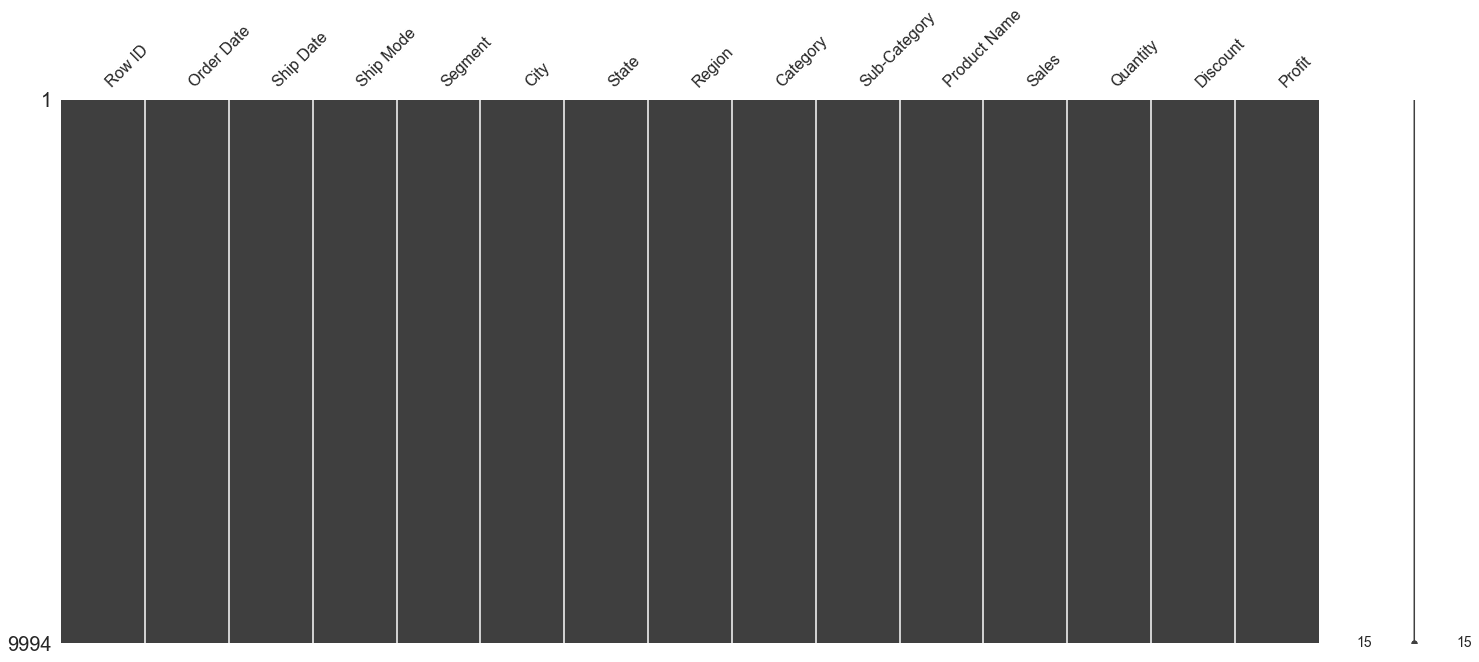

In [6]:
msno.matrix(df)

In [7]:
print(df.isnull().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
print(df.isna().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [9]:
df.shape

(9994, 15)

In [10]:
df.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Renombrado de columnas

In [26]:
# Renombrar columnas para facilitar el tratamiento
df.rename({'Row ID' : 'row_id',
           'Order Date' : 'order_date',
           'Ship Date' : 'ship_date',
           'Ship Mode' : 'ship_mode',
           'Segment' : 'segment',
           'City' : 'city',
           'State' : 'state',
           'Postal Code' : 'postal_code',
           'Region' : 'region',
           'Product ID' : 'product_id',
           'Category' : 'category',
           'Sub-Category' : 'subcategory',
           'Product Name' : 'product_name',
           'Sales' : 'sales',
           'Quantity' : 'quantity',
           'Discount' : 'discount',
           'Profit' : 'profit'
           },  axis="columns", inplace=True)
df.columns

df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit
5225,5226,6/21/2016,6/26/2016,Standard Class,Consumer,New York City,New York,East,Office Supplies,Binders,SpineVue Locking Slant-D Ring Binders by Cardinal,36.560,5,0.2,12.7960
5751,5752,1/22/2016,1/28/2016,Standard Class,Consumer,San Diego,California,West,Office Supplies,Labels,Avery 475,44.400,3,0.0,22.2000
5619,5620,9/25/2016,9/30/2016,Standard Class,Corporate,La Crosse,Wisconsin,Central,Technology,Accessories,Logitech Wireless Headset h800,499.950,5,0.0,174.9825
9222,9223,10/13/2017,10/14/2017,First Class,Consumer,Lafayette,Louisiana,South,Office Supplies,Paper,Xerox 231,25.920,4,0.0,12.4416
5926,5927,4/8/2014,4/12/2014,Standard Class,Corporate,Decatur,Alabama,South,Furniture,Tables,"SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...",1215.920,8,0.0,316.1392
1590,1591,4/15/2016,4/19/2016,Standard Class,Corporate,Grapevine,Texas,Central,Office Supplies,Art,"Dixon Ticonderoga Erasable Colored Pencil Set,...",33.488,7,0.2,5.8604
7524,7525,9/10/2014,9/16/2014,Standard Class,Consumer,Gresham,Oregon,West,Office Supplies,Envelopes,Peel & Seel Envelopes,21.728,7,0.2,7.6048
948,949,11/28/2017,12/2/2017,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Furnishings,Luxo Professional Fluorescent Magnifier Lamp w...,1007.232,6,0.2,75.5424
3055,3056,8/28/2015,9/1/2015,Standard Class,Corporate,Chicago,Illinois,Central,Technology,Copiers,Canon Imageclass D680 Copier / Fax,2799.960,5,0.2,874.9875
2364,2365,3/13/2016,3/18/2016,Standard Class,Home Office,Waynesboro,Virginia,South,Office Supplies,Appliances,"Eureka The Boss Lite 10-Amp Upright Vacuum, Blue",160.320,2,0.0,44.8896


In [27]:
df.ship_mode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

In [28]:
# Se eliminan los duplicados si es que existen
df = df.drop_duplicates()
df.shape

(9994, 15)

In [29]:
# Se cambia de tipo de dato int a string para evitar incurrir en errores de análisis cuantitativos
df['row_id'] = df['row_id'].astype(str)

In [30]:
# Cuantos datos hay por cada columna?
#df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        9994 non-null   object 
 1   order_date    9994 non-null   object 
 2   ship_date     9994 non-null   object 
 3   ship_mode     9994 non-null   object 
 4   segment       9994 non-null   object 
 5   city          9994 non-null   object 
 6   state         9994 non-null   object 
 7   region        9994 non-null   object 
 8   category      9994 non-null   object 
 9   subcategory   9994 non-null   object 
 10  product_name  9994 non-null   object 
 11  sales         9994 non-null   float64
 12  quantity      9994 non-null   int64  
 13  discount      9994 non-null   float64
 14  profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [31]:
df.describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Detección de outliers

<Axes: xlabel='sales'>

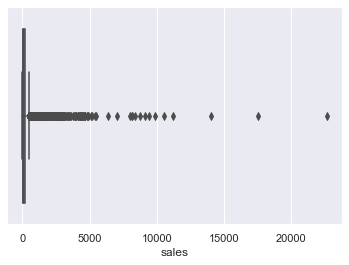

In [32]:
# boxplot Sales
sns.boxplot(x=df['sales'])

In [33]:
# # Se calculas los Cuantiles del df
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# # Que calculamos acá?
# IQR = Q3 - Q1
# print(IQR)

In [34]:
# # Que estamos calculando acá? Si ya calculamos los Q1 y Q3?
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df.shape

<Axes: xlabel='sales'>

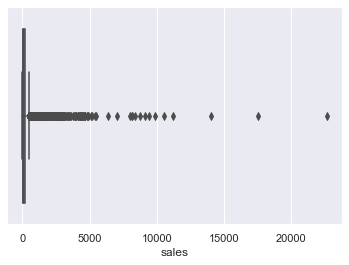

In [35]:
sns.boxplot(x=df['sales'])

<Axes: xlabel='quantity'>

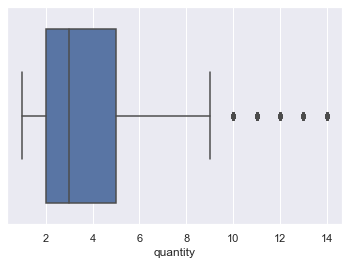

In [36]:
sns.boxplot(x=df['quantity'])

<Axes: xlabel='profit'>

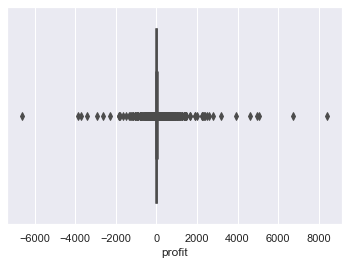

In [37]:
sns.boxplot(x=df.profit)

### Revisamos algunas distribuciones de variables

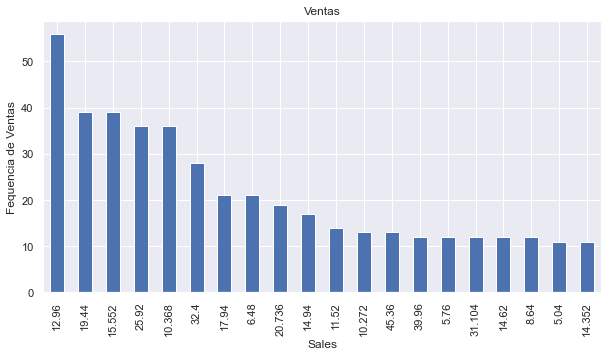

In [38]:
df.sales.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Ventas")
plt.ylabel('Fequencia de Ventas')
plt.xlabel('Sales');

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


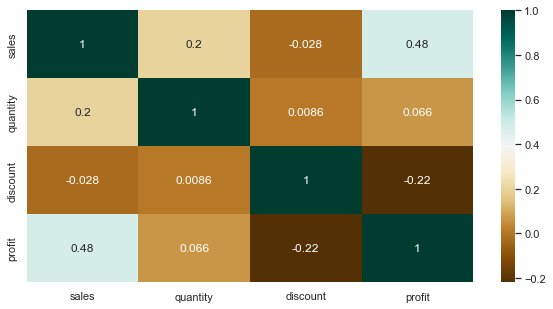

In [39]:
# Coeficiente de correlación
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Segmentación de las ventas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


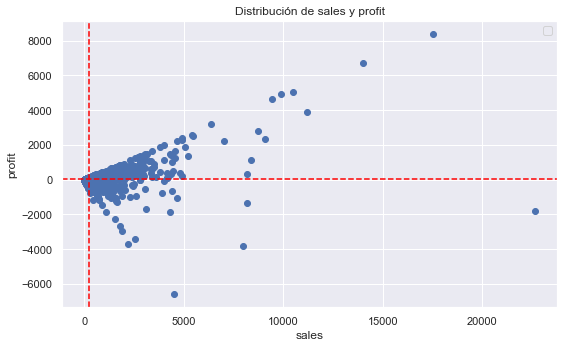

In [44]:
# Scatter plot para visualizar datos numéricos
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['sales'], df['profit'])

plt.axvline(x=prom_sales, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=prom_profit, color='red', linestyle='--', linewidth=1.5)

plt.title('Distribución de sales y profit')

ax.set_xlabel('sales')
ax.set_ylabel('profit')

plt.legend()
plt.tight_layout();
plt.show();



### Asignación de segmentos
1. Vamos a asignar una categoría según el valor de las ventas/profit
2. Vamos a crear una nueva columna llamada "Segmento"
3. A través de un ciclo for y el uso de ifelse vamos a asignar la categoría

In [45]:
# Calcula el promedio de sales y profit
prom_sales = df.sales.mean()
prom_profit = df.profit.mean()

# Crea una lista para almacenar los segmentos
segmento = []

# Itera a través de las filas del DataFrame
for index, row in df.iterrows():
    if row['sales'] < prom_sales and row['profit'] < prom_profit:
        segmento.append('bajo_bajo')
    elif row['sales'] < prom_sales and row['profit'] > prom_profit:
        segmento.append('bajo_alto')
    elif row['sales'] > prom_sales and row['profit'] < prom_profit:
        segmento.append('alto_bajo')
    elif row['sales'] > prom_sales and row['profit'] > prom_profit:
        segmento.append('alto_alto')
    else:
        segmento.append('otros')  # Manejo de casos que no cumplen ninguna condición

# Agrega la columna 'segmento' al DataFrame
df['segmento'] = segmento
df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit,segmento
8078,8079,6/23/2015,6/29/2015,Standard Class,Corporate,East Point,Georgia,South,Technology,Accessories,Dell Slim USB Multimedia Keyboard,75.000,3,0.0,18.0000,bajo_bajo
9607,9608,12/5/2017,12/8/2017,Second Class,Consumer,New York City,New York,East,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,21.600,6,0.0,9.9360,bajo_bajo
2097,2098,5/15/2016,5/20/2016,Standard Class,Home Office,Jackson,Mississippi,South,Office Supplies,Art,Newell 344,8.340,3,0.0,2.1684,bajo_bajo
8877,8878,9/17/2017,9/23/2017,Standard Class,Consumer,Morristown,New Jersey,East,Technology,Machines,Lexmark 20R1285 X6650 Wireless All-in-One Printer,480.000,4,0.0,225.6000,alto_alto
1330,1331,6/2/2017,6/6/2017,Standard Class,Home Office,Lorain,Ohio,East,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,2.970,1,0.4,-0.6435,bajo_bajo
9203,9204,10/30/2016,11/3/2016,Standard Class,Corporate,New York City,New York,East,Office Supplies,Art,Boston KS Multi-Size Manual Pencil Sharpener,114.950,5,0.0,32.1860,bajo_alto
3855,3856,10/23/2017,10/28/2017,Second Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,Storex Dura Pro Binders,3.564,3,0.8,-6.2370,bajo_bajo
1199,1200,4/8/2016,4/12/2016,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,alto_bajo
4067,4068,11/1/2014,11/5/2014,Standard Class,Corporate,Charlotte,North Carolina,South,Office Supplies,Labels,Avery 513,47.808,12,0.2,15.5376,bajo_bajo
3354,3355,7/19/2014,7/24/2014,Standard Class,Corporate,Bristol,Connecticut,East,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",70.560,1,0.3,-4.0320,bajo_bajo


### Uso de tablas de contingencia

## Uso de tablas de contingencia con Pandas

In [43]:
# Ejemplos
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.ship_mode)
table_region

ship_mode,First Class,Same Day,Second Class,Standard Class
region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882


In [ ]:
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.segmento, margins=True, margins_name="Total")
table_region

## Análisis Univariado
* Analizar los tipos de distribución de las variables numéricas.
* Use estadística descriptiva
* Probar distribución normal. Investigar los test y scripts para desarrollar esto.
* Recomiendo revisar la librería Scipy y los gráficos de distribución de Seaborn y Matplotlib
  * Link: https://scipy.org/
* Investigar sobre los test de normalidad y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Investigar sobre pruebas para variables categoricas y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* Investigar sobre pruebas para variables numéricas (t-test) y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Finanzas (2ptos)
### Que ciudades son las que tiene mejor Profit
1. Rentabilidad entre categorías. Evidencia estadística
2. Rentabilidad entre segmentos. Hay diferencia estadística

# Operaciones (2ptos)
### Cuales son los state que tiene mayor nivel de ventas
1. A que estados estamos enviando más? Evidencia estadística
2. Diferencia entre segmentos. Hay diferencia estadística


# Comercial (2ptos)
## Cuales son las categorías de productos más rentables
1. Hay diferencias entre categorías? (estadística)
2. En que estados se presentan estas diferencias
3. En que categorías se detectaron los mayores descuentos

# Conclusiones (3ptos)
***ATENCIÓN***
* Las conclusiones deben incluír las métricas investigadas en los análisis que se realizaron
* Se probará su script para que el código sea reproducible

1. Que conclusiones podemos sacar de este análisis?
2. Que recomendaciones podemos dar a la empresa?
3. Que análisis adicionales podemos hacer?